In [1]:
# 라이브러리 불러오기
from selenium import webdriver # 브라우저 자동화를 위한 모듈
import requests # HTTP 요청을 보내기 위한 모듈
from bs4 import BeautifulSoup as bs # HTML 내용 파싱을 위한 모듈
import pandas as pd # 데이터 조작 및 분석을 모듈
import time # 코드 실행 속도 조절을 위한 모듈
import re # 정규 표현식 사용을 위한 모듈
import pickle # 파이썬 객체 직렬화를 위한 모듈
from selenium.webdriver.common.by import By # 다양한 방법으로 엘리먼트를 찾기 위한 모듈
import datetime # 날짜와 시간 연산을 위한 모듈

C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [12]:
coopang = pd.read_csv('coopang.csv')
oliveyoung = pd.read_csv('oliveyoung.csv')


oliveyoung = oliveyoung[(oliveyoung.price <= 78000) & (oliveyoung.price >= 10000)].reset_index(drop=True)
coopang = coopang[coopang.price >= 10000].reset_index(drop=True)

# CSV 파일로 저장
oliveyoung.to_csv('oliveyoung.csv', index=False, encoding="utf-8-sig")
coopang.to_csv('coopang.csv', index = False, encoding ="utf-8-sig")

In [21]:
cosmetic = pd.concat([coopang,oliveyoung],ignore_index=True)
cosmetic.to_csv('cosmetic.csv', index=False, encoding = "utf-8-sig")
cosmetic

,title,price,review_cnt
0,"이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개",17020,3653
1,"에스트라 아토베리어365 크림 플러스, 90ml, 1개",29500,9511
2,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개",22870,52021
3,"에스트라 아토베리어365 하이드로 수딩 크림, 60ml, 1개",19820,1172
4,"닥터지 블랙 스네일크림, 50ml, 1개",10010,38321
...,...,...,...
994,[가벼운 여름용] 피지오겔 DMT 하이드로 젤 수분크림 70ml+30ml 기획,23500,634
995,수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml),36000,17
996,숨37 워터풀 마린 릴리프 젤 크림 50ml,68000,39
997,[한정수량]닥터디퍼런트 비타리프트 에이 더블 기획,56700,920


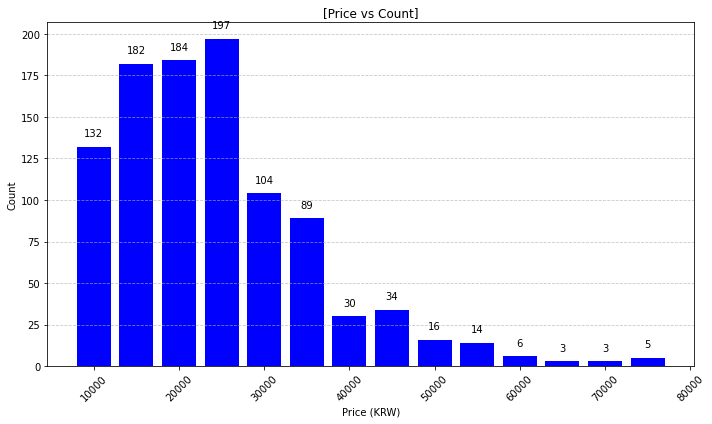

In [16]:
import matplotlib.pyplot as plt

# 가격을 5000원 단위로 나누어 가격 범위 생성
price_ranges = range((cosmetic['price'].min() // 5000) * 5000, ((cosmetic['price'].max() + 5000) // 5000) * 5000, 5000)

# 각 가격 범위에 대한 제품 개수 계산
review_counts = []
for price_range in price_ranges:
    filtered_data = cosmetic[(cosmetic['price'] >= price_range) & (cosmetic['price'] < price_range + 5000)]
    review_counts.append(filtered_data['review_cnt'].count())

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(price_ranges, review_counts, color='blue', width=4000)  # 가격 범위 별로 바 그래프 그리기
plt.title('[Price vs Count]')
plt.xlabel('Price (KRW)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바 위에 값을 표시
for bar, num in zip(bars, review_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5, str(num), 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


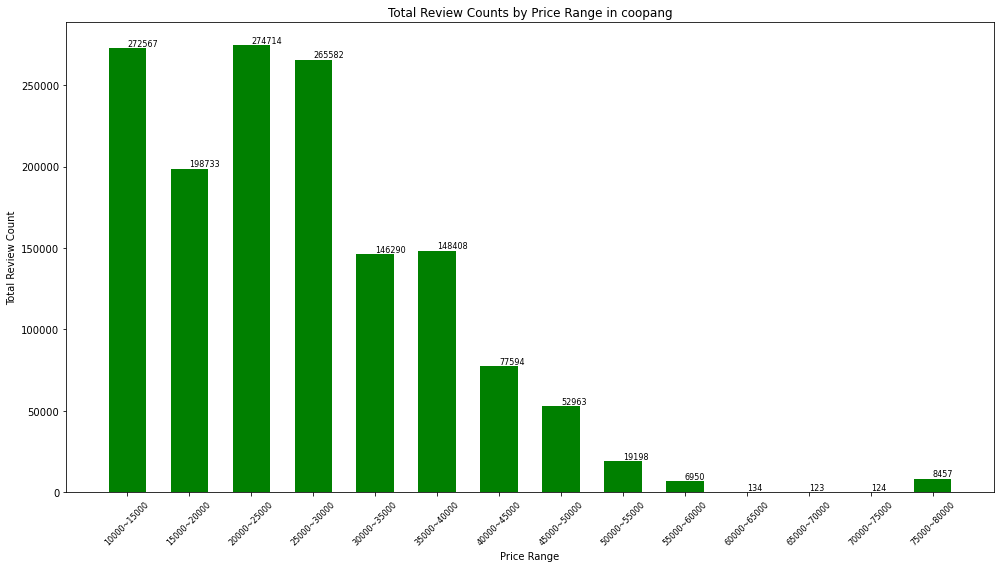

In [15]:
# 5000원 단위 범위 설정
price_ranges = [(10000, 15000), (15000, 20000), (20000, 25000), (25000, 30000),
                (30000, 35000), (35000, 40000), (40000, 45000), (45000, 50000),
                (50000, 55000), (55000, 60000), (60000,65000), (65000,70000),
                (70000,75000), (75000,80000)]

# 각 가격 범위에 대한 review_cnt_total 계산
review_cnt_totals = []
price_range_labels = []

for start_price, end_price in price_ranges:
    # 데이터 필터링
    data = cosmetic[(cosmetic.price < end_price) & (cosmetic.price >= start_price)]
    
    # review_cnt_total 계산
    review_cnt_total = data['review_cnt'].sum()
    review_cnt_totals.append(review_cnt_total)
    price_range_labels.append(f'{start_price}~{end_price}')

# 바 그래프 그리기
plt.figure(figsize=(14, 8))
bars = plt.bar(price_range_labels, review_cnt_totals, color='green', width=0.6)

# 바 그래프 위에 값 작성
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', fontsize=8)

plt.title('Total Review Counts by Price Range in coopang')
plt.xlabel('Price Range')
plt.ylabel('Total Review Count')

plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

In [19]:
cosmetic['review_cnt'].sum()

1471837